## Geophysical Data Analysis: Discrete Inverse Theory
### William Menke
Third Edition  
Transcribed and translated (from Matlab to Python) by Joshua Poirier

## Chapter Four
# Solution of the linear, Gaussian inverse problem, Viewpoint 3: Maximum Likelihood Methods  

### 5.1 The mean of a group of measurements  

Suppose that an experiment is performed *N* times and that each time a single datum $d_i$ is collected.  Suppose further that these data are all noisy measurements of the same model parameter $m_1$.  In the view of probability theory, *N* realizations of random variables, all of which have the same probability density function, have been measured.  If these random variables are Gaussian, their joint probability density function can be characterized in terms of a variance $\sigma^2$ and a mean $m_1$ as:  

\begin{equation*}
p(\mathbf{d}) = \sigma^{-N} (2 \pi)^{-N/2} \: \text{exp} \left[ - \frac{1}{2} \sigma^{-2} \sum_{i=1}^N [d_i - m_1]^2 \right]\\
\end{equation*}

The data $\mathbf{d}^{\text{obs}}$ can be represented graphically as a point in the *N*-dimensional space whose coordinate axes are $d_1, d_2, \cdots, d_N$ (below, left).  The probability density function for the data can also be graphed (below, right).  Note that the probability density function is centered about the line $d_1 = d_2 = \cdots = d_N$, since all the *d*s are supposed to have the same mean, and that it is spherically symmetric, since all the *d*s have the same variance.

In [35]:
# declare libraries used by this notebook
import math

import numpy as np
from numpy.linalg import inv
from numpy.linalg import det

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure

plt.style.use('ggplot')
%matplotlib inline

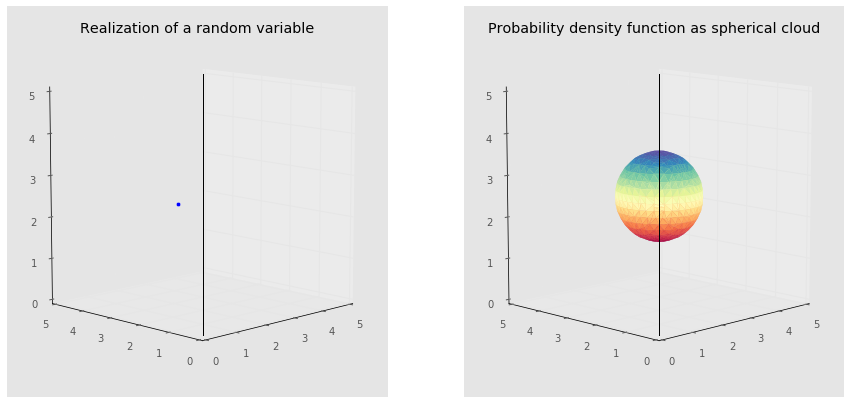

In [21]:
# point inside a 3d box

x = np.arange(31) * 5 / 30
y = np.arange(31) * 5 / 30
z = np.arange(31) * 5 / 30

# randomly choose a point in 3-space from a normal distribution (mean=2.5, sd=0.5)
rbar1 = np.random.normal(2.5, 0.5, 3)

# build 3d grid of probability density function
rbar2 = np.array([(2.5, 2.5, 2.5)])
sd = 0.5
C = sd**2 * np.eye(3)
CI = inv(C)
DC = det(C)
norm = (2 * math.pi)**(3/2) * DC**0.5

# calculate PDF probabilities
PP = np.zeros((31,31,31))
for i in range(0,31):
    for j in range(0,31):
        for k in range(0,31):
            r = np.array([(i * 5/30, j * 5/30, k * 5/30)])
            PP[i,j,k] = math.exp((-0.5 * (r-rbar2))[0].dot(CI.dot((r-rbar2).reshape(3,1))))/norm

# threshold PDF probability (PP) volume as a triangulated isosurface
verts, faces = measure.marching_cubes(PP, np.max(PP)/10, spacing=(5/30, 5/30, 5/30))
            
# build figure
plt.subplots(1, 2, figsize=(15, 7))

# randomly chosen point graph
ax = plt.subplot(121, projection='3d')
ax.scatter(rbar1[0], rbar1[1], rbar1[2])
plt.plot(x,y,z, color='black')
ax.set_xlim3d(0, 5)
ax.set_ylim3d(0, 5)
ax.set_zlim3d(0, 5)
ax.view_init(10, 225)
plt.title('Realization of a random variable')

# PDF as a spherical cloud graph
ax = plt.subplot(122, projection='3d')
plt.plot(x,y,z, color='black')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='Spectral', lw=0)
ax.set_xlim3d(0, 5)
ax.set_ylim3d(0, 5)
ax.set_zlim3d(0, 5)
ax.view_init(10, 225)
plt.title('Probability density function as spherical cloud')

Suppose that we guess a value for the unknown mean and variance, thus fixing the center and diameter of the probability density function.  We can then calculate its numerical value at the data $p(\mathbf{d}^{\text{obs}})$.  If the guessed values of mean and variance are close to being correct, then $p(\mathbf{d}^{\text{obs}})$ should be a relatively large number.  If the guessed values are incorrect, then the probability, or *likelihood*, of the observed data will be small.  We can imagine sliding the cloud of probability (above, right) up along the line and adjusting its diameter until its probability at the point $\mathbf{d}^{\text{obs}}$ is maximized.  

This procedure defineds a method of estimating the unknown parameters in the distribution, the *method of maximum likelihood*.  It asserts that the optimum values of the parameters maximize the probability that the observed data are in fact observed.  In other words, the value of the probaiblity density function at the point $\mathbf{d}^{\text{obs}}$ is made as large as possible.  The maximum is located by differentiating $p(\mathbf{d}^{\text{obs}})$ with respect to mean and variance and setting the result to zero as:  

\begin{equation*}
\frac{\partial p}{\partial m_1} = \frac{\partial p}{\partial \sigma} = 0\\
\end{equation*}

Maximizing $\log \: p(\mathbf{d}^{\text{obs}})$ gives the same result as maximizing $p(\mathbf{d}^{\text{obs}})$, since the log(*p*) is a monotonic function of *p*.  We therefore compute derivatives of the *likelihood function*, $L= \log \: p(\mathbf{d}^{\text{obs}})$.  Ignoring the overall normalization of $(2 \pi)^{-N/2}$ we have:  

\begin{equation*}
L = \log (p(\mathbf{d}^{\text{obs}})) = -N \log (\sigma) - \frac{1}{2} \sigma^{-2} \sum_{i=1}^N (d_i^{\text{obs}}-m_1)^2\\
\frac{\partial L}{\partial m_1} = 0 = \frac{1}{2} \sigma^{-2} 2 m_1 \sum_{i=1}^N (d_i^{\text{obs}}-m_1)\\
\frac{\partial L}{\partial \sigma} = 0 = - \frac{N}{\sigma} + \sigma^{-3} \sum_{i=1}^N (d_i^{\text{obs}}-m_1)^2\\
\end{equation*}

These equations can be solved for the estimated mean and variance as:

\begin{equation*}
m_1^{\text{est}} = \frac{1}{N} \sum_{i=1}^N d_i^{\text{obs}} \qquad \text{and} \qquad \sigma^{\text{est}} = \left[ \frac{1}{N} \sum_{i=1}^N (d_i^{\text{obs}} - m_1^{\text{est}})^2 \right]^{1/2}\\
\end{equation*}

The estimate for $m_1$ is just the usual formulas for the sample mean.  The estimate for $\sigma$ is the root mean squared error and also is almost the formula for the sample standard deviation, except that it has a leading factor of 1/*N*, instead of 1/(*N*-1).  We note that these estimates arise as a direct consequence of the assumption that hte data possess a Gaussian distribution.  If the data distribution were not Gaussian, then the arithmetic mean might not be an appropriate estimate of the mean of the distribution.

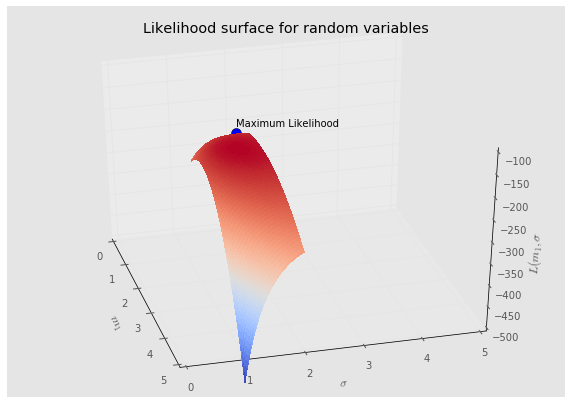

In [73]:
# random data
N = 100
d = np.random.normal(2.5, 1.5, N)

# grid
m = 1.5 + np.arange(51) * 3.5 / 50
s = 1 + np.arange(51) / 50
m, s = np.meshgrid(m,s)

L = np.zeros((51,51))
for i in range(0,51):
    for j in range(0,51):
        L[i, j] = -100 * math.log(2*math.pi)/2 - 100 * math.log(s[i,j]) - 0.5 * sum(np.square(d-m[i,j])) / s[i,j]**2

imax = np.unravel_index(np.argmax(L), L.shape)
lmax = np.max(L)
        
# build figure
plt.subplots(1, 1, figsize=(10, 7))

# maximum likelihood surface graph
ax = plt.subplot(111, projection='3d')
surf = ax.plot_surface(m, s, L, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.text(m[imax], s[imax], lmax+50, 'Maximum Likelihood', None)
ax.scatter(m[imax], s[imax], lmax+35, color='black', s=100)
ax.set_xlim3d(0, 5)
ax.set_ylim3d(0, 5)
ax.set_zlim3d(-500, -100)
ax.view_init(35, 345)
ax.set_xlabel(r'$m_1$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'$L(m_1,\sigma$')
plt.title('Likelihood surface for random variables')